In [2]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt",delimiter=" ",header=None,names=("date","time","ir","lidar"))
data


,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


In [6]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


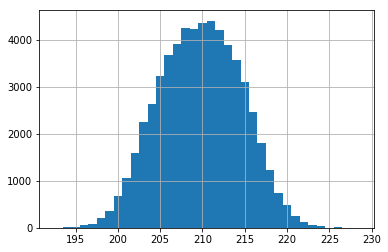

In [9]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align="left")
plt.show()

In [11]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1,mean2)

209.73713297619855 209.73713297619855


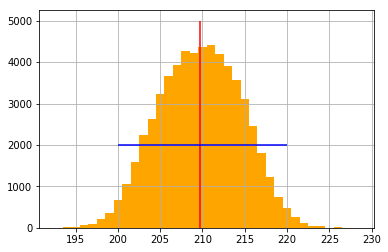

In [16]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color = "orange",align="left")
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.hlines(2000,xmin=200,xmax=220,color="blue")
plt.show()

In [20]:
#分散を計算

import numpy as np

#定義から計算
zs = data["lidar"].values
mean =sum(zs)/len(zs)
diff_square = [(z-mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))   #標本分散
unbaised_var = sum(diff_square)/(len(zs)-1) #不偏分散

print(sampling_var)
print(unbaised_var)

#Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof=False) #標本分散
pandas_unbaised_var = data["lidar"].var()  #デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_unbaised_var)

#Numpyを使用
numpy_sampling_var = np.var(data["lidar"]) #デフォルト（標本分散）
numpy_unbaised_var = np.var(data["lidar"],ddof=1) #不偏分散

print(numpy_sampling_var)
print(numpy_unbaised_var)

23.407709770274106
23.40810659855441
23.4077097702742
23.40810659855441
23.407709770274106
23.40810659855441


In [21]:
#標準偏差を計算

import math

#定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbaised_var)

#Pandasを使用
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.83819249292072
